### Configuration Generator - Monte Carlo

Originally written by Matteo Martinelli, modified by Francesco Mambretti

In [1]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

**Note**  
The `input.lattice.dat` file is a little different in MC and PT simulations. 
Pay attention in using the right `input.lattice_template.dat` prototype and the right _notebook_.

In the cell below just **decomment (or implement) the desired lattice configuration**, by choosing the following set of parameters:
- name -->  name for the directory in which the configuration will be saved
- u1x -->   coordinate of first primitive vector along x axis
- u2x -->   coordinate of second primitive vector along x axis
- u2y -->   coordinate of second primitive vector along y axis
- ang -->   angle between primitive vectors (radiant) (optional)
- theta --> angle of dimers orientation in respect to x axis (radiant) 
- dr -->    distance between dimers


Then set the lattice dimensions with the following parameters:
- nx --> number of triangular cells along x axis
- ny --> number of triangular cells along y axis
    
    
    
Running the cell below the lattice is generated and a plot of the spins is shown. If everything satiesfies you it is possible to save the configuration and create the relative `input.lattice.dat` file in a directory named: config.*name*.*npart* where *name* is chosen in the set of parameters and *npart* is the number of total nparts of the configuration



N.B
Also dimers' center of mass positions are generated since it is necessary in order to have particles position. Maybe be useful in some other simulations or code.
They are not saved anywhere but it's simple to add this possibility

14.2348 12.327698417790726
npart =  200


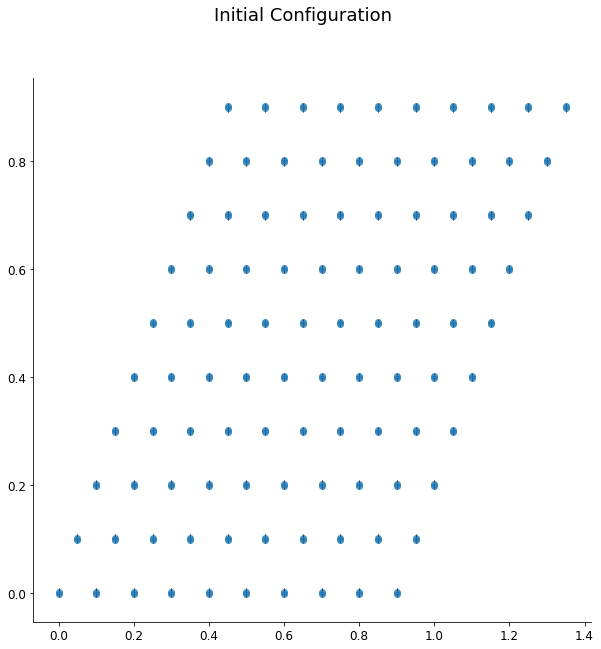

In [2]:
random = 0 # determines the orientation of dimers - here they are all aligned
#random = 1 - uncomment this if you want to shuffle relative dimers orientations

# Triangular deformed, ground state, theta=pi-alpha/2
'''
name = "gs.a3"
u1x = 1.42467
u2x = 0.70877
u2y = 1.23173
ang  = np.atan(u2y/u2x)
theta = np.pi-ang*0.5 
dr = 0.05
#
'''

# Triangular deformed, ground state, theta=alpha/2
'''
name = "gs.a2"
u1x = 1.42466  
u2x = 0.71589
u2y = 1.23174
ang = np.atan(u2y/u2x)
theta = ang*0.5
dr = 0.05
'''

#Triangular deformed ground state, angle pi/2
'''
name = "gs.pi2.random"
u1x = 1.42111   
u2x = 0.71055   
u2y = 1.23483
ang = np.atan(u2y/u2x)
theta = 1.569
dr = 0.05
#
'''

# Perfect triangular lattice, dimers oriented along +/-pi/2

name = "equi"
equi_lattice=1.42348 # equilibrium lattice step, obtained by density for the 2-particle
                     # cluster phase: rho_2=1.13971 [R^{-2}]
u1x = 1*equi_lattice
u2x = 0.5*u1x
u2y = np.sqrt(3) * 0.5 * equi_lattice    
ang = np.pi/3  # perfect triangular lattice 
theta = np.pi * 0.5 # dimers orientation
dr = 0.05

####################################################################################################

nx = 10    # cells on x axis
nyr = 5    #number of rectangular cells on y axis 
ny = 2*nyr 

nspin = nx*ny
npart = 2*nspin

xm = np.zeros(nspin)
ym = np.zeros(nspin)

x = np.zeros (npart)
y = np.zeros (npart)

xappo = 0
for i in range (ny):
    xappo = i*u2x
    for j in range (nx):
        xm[i*nx+j] = xappo
        xappo += u1x
        ym[i*nx+j] = i*u2y

# box sides in physical units
boxx = nx * u1x
boxy = ny * u2y
print (boxx, boxy)
print ('npart = ', npart)

"""
#Completely random config
seed = 1
np.random.seed(seed)
name = "rand.random.{}".format(seed)
random = 1
dr = 0.05

boxx = 1
boxy = 1
xm = np.random.uniform(-0.5, 0.5, nspin)
ym = np.random.uniform(-0.5, 0.5, nspin)
#"""


if random ==1:
    theta = np.random.uniform(-0.5*np.pi, 0.5*np.pi, nspin)
else: #spins are aligned
    theta = np.full(nspin, theta)

for i in range(nspin):
    x[2*i] = xm[i] - dr * 0.5 * np.cos(theta[i])
    y[2*i] = ym[i] - dr * 0.5 * np.sin(theta[i])
    x[2*i+1] = xm[i] + dr * 0.5 * np.cos(theta[i])
    y[2*i+1] = ym[i] + dr * 0.5 * np.sin(theta[i])

    
alpha = theta
xi = xm - dr * 2 * np.cos(alpha)
yi = ym - dr * 2 * np.sin(alpha)
xf = xm + dr * 2 * np.cos(alpha)
yf = ym + dr * 2 * np.sin(alpha)


xm = xm/boxx
ym = ym/boxy
x = x/boxx
y = y/boxy

xi = xi/boxx
yi = yi/boxy
xf = xf/boxx
yf = yf/boxy

    
#print graph
fig, axarr = plt.subplots (1 ,1 , figsize=(10,10))
fig.suptitle("Initial Configuration")


for i in range(xm.size):
    axarr.arrow(xi[i], yi[i], xf[i]-xi[i], yf[i]-yi[i], width= 0.00001, head_width = 0.00, fc='black', length_includes_head=False)

#axarr.scatter(xm, ym, label='Cluster', color='orange')
axarr.scatter(x, y, label = 'Particles', alpha = 0.7)

plt.show()

In [3]:
# write the parameters on file

from decimal import * 
import string
import os

theta_dgr = theta * 180/np.pi

c = Context(prec = 9, rounding = ROUND_DOWN)
setcontext(c)

path = 'config.{}.{}'.format(name, npart)
if not os.path.exists(path):
    os.mkdir(path)
f = open(path+"/config.0","w+")
for i in range (npart):
    line = str(Decimal(x[i])+Decimal(0)) + "     " + str(Decimal(y[i])+Decimal(0)) + "    " + str(int(i/2)) + "\n"
    f.write(line)
f.close()

os.system ('cp input.lattice_template.dat ' + path + '/input.lattice.dat')


s = open(path + '/input.lattice.dat').read()
s = s.replace('$U1X', format(u1x)).replace('$U2X', format(u2x)).replace('$U2Y', 
        format(u2y)).replace('$NX', format(nx)).replace('$NY', format(ny)).replace('$ANGLE', format(ang))
f = open(path + '/input.lattice.dat', 'w')
f.write(s)
f.close()